# KNN Model for Banglore House Price Prediction

### Importing of libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math as m
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.metrics import r2_score, mean_squared_error

### Reading Data File

In [2]:
def read_data():
    data=pd.read_csv("D:/DATA SCIENCE/Asignments/Python/KNN Assignment/bangalore house price prediction OHE-data.csv")
    return data

### Calling the read_data function

In [3]:
data=read_data()
print(data.head())

   bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
0   3.0      2.0  150.0          1672.0    3     8971.291866   
1   3.0      3.0  149.0          1750.0    3     8514.285714   
2   3.0      2.0  150.0          1750.0    3     8571.428571   
3   2.0      2.0   40.0          1250.0    2     3200.000000   
4   2.0      2.0   83.0          1200.0    2     6916.666667   

   area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
0                              1                        0   
1                              0                        1   
2                              1                        0   
3                              1                        0   
4                              0                        0   

   area_typePlot  Area  availability_Ready To Move  ...  \
0                    0                           1  ...   
1                    0                           1  ...   
2                    0                           1  ...   
3           

### Checking our data

In [4]:
print(data.shape)
print("-------------------------------------------")
print(data.columns)
print("-------------------------------------------")
print(data.dtypes)
print("-------------------------------------------")
print(data.info())

(7120, 108)
-------------------------------------------
Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move',
       ...
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object', length=108)
-------------------------------------------
bath                           float64
balcony                        float64
price                          float64
total_sqft_int                 float64
bhk                              int64
                                ...   
location_Hosur Road              int64
location_Horamavu Banaswadi      int64
location_Domlur                  int64
locat

In [5]:
## Checking the unique values of dependable variables to detect any visual outliers in data
data["balcony"].unique()


array([2.        , 3.        , 1.        , 0.        , 1.58437574])

In [6]:
data["bath"].unique()

array([3., 2., 1., 4., 5., 9., 6., 8., 7.])

#### Conclusion: Here we can see houses with 1.58437574 which occurs unusual

In [7]:
## Let's check the number of records with this balcony count
balcony_error=data[(data['balcony']>1.1) & (data['balcony']<1.7)]
print(balcony_error)

      bath   balcony    price  total_sqft_int  bhk  price_per_sqft  \
48     2.0  1.584376    86.00          1200.0    2     7166.666667   
87     9.0  1.584376   500.00          4500.0    9    11111.111111   
93     4.0  1.584376   333.00          3900.0    4     8538.461538   
108    5.0  1.584376   110.00          2500.0    5     4400.000000   
127    4.0  1.584376   250.00          3245.0    4     7704.160247   
...    ...       ...      ...             ...  ...             ...   
7074   2.0  1.584376    46.17          1200.0    2     3847.500000   
7077   9.0  1.584376  1900.00         12000.0    8    15833.333333   
7080   5.0  1.584376  1950.00         10000.0    5    19500.000000   
7093   5.0  1.584376   220.00          3600.0    4     6111.111111   
7114   6.0  1.584376   390.00          3800.0    6    10263.157895   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
48                                1                        0   
87                             

In [8]:
## Now check that how much percent these makes up of total data 
(202/7120)*100

2.837078651685393

#### we can see there are around 202 records with 1.584376 no of balconies.This 202 records occupy around 2.8 percent of our data. We have total 7120 records,so lets drop this rows with errors.

In [4]:
## first create a copy of original data
df=data.copy()
df.head()
df.shape

(7120, 108)

### Dropping rows  with errors as calculated above

In [5]:
df1=df[(df["balcony"]==0)|(df['balcony']==1)|(df['balcony']==2)|(df['balcony']==3)]
df1

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.00,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.00,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.00,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.00,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.00,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7115,3.0,2.0,325.00,2900.0,3,11206.896552,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7116,3.0,1.0,84.83,1780.0,3,4765.730337,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7117,2.0,1.0,48.00,880.0,2,5454.545455,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7118,2.0,1.0,55.00,1000.0,2,5500.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df1['balcony'].unique()

array([2., 3., 1., 0.])

In [12]:
df1.columns

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move',
       ...
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object', length=108)

In [13]:
print("Total number of houses are ", len(df1)) 
print("Houses with Super built-up Area--",len(df1[df1['area_typeSuper built-up  Area']==1]))
print("House with Built-up Area ", len(df1[df1['area_typeBuilt-up  Area']==1]))
print("House with Plot Area ", len(df1[df1['area_typePlot  Area']==1]))
print("Number of Ready to Move Houses are ",len(df1[df1['availability_Ready To Move']==1]))
print("Maximum bhk house is",df1['bhk'].max())
print("Average price per sqft",df1['price_per_sqft'].mean())

Total number of houses are  6918
Houses with Super built-up Area-- 5212
House with Built-up Area  1257
House with Plot Area  417
Number of Ready to Move Houses are  5465
Maximum bhk house is 9
Average price per sqft 5868.9193989551


### Checking for missing values

In [14]:
df1.isnull().sum()

bath                           0
balcony                        0
price                          0
total_sqft_int                 0
bhk                            0
                              ..
location_Hosur Road            0
location_Horamavu Banaswadi    0
location_Domlur                0
location_Mahadevpura           0
location_Tumkur Road           0
Length: 108, dtype: int64

#### Renaming columns

In [6]:
df2=df1.rename({'area_typeSuper built-up  Area':"super_builtup_area",'area_typeBuilt-up  Area':"builtup_area",'area_typePlot  Area':"plot_area",'availability_Ready To Move':"available"},axis=1)
df2.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,super_builtup_area,builtup_area,plot_area,available,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df2.columns

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'super_builtup_area', 'builtup_area', 'plot_area', 'available',
       ...
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object', length=108)

## Exploratory Data Analysis

### Checking Outliers

<Axes: >

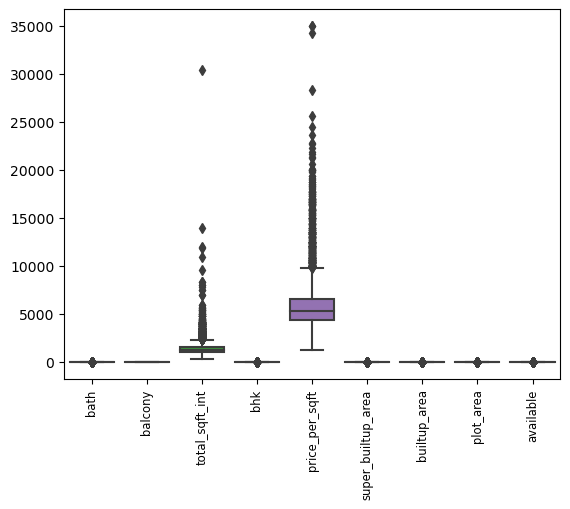

In [27]:
plt.xticks(rotation=90, fontsize="small")

sns.boxplot(data=df2[['bath', 'balcony', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'super_builtup_area', 'builtup_area', 'plot_area', 'available']])


#### 2 columns "total_sqft_int" and "price_per_sqft" showing outliers as it varies for different houses

Text(0.5, 1.0, 'BHK v/s Price Per SQFT')

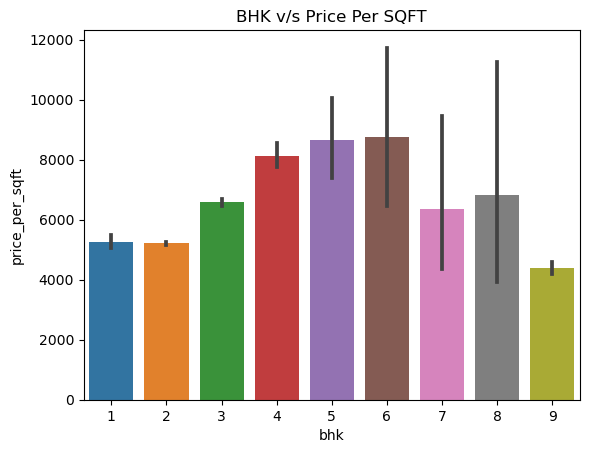

In [29]:
sns.barplot(x='bhk', y='price_per_sqft', data=df2)
plt.title("BHK v/s Price Per SQFT")

<Axes: xlabel='bhk', ylabel='price_per_sqft'>

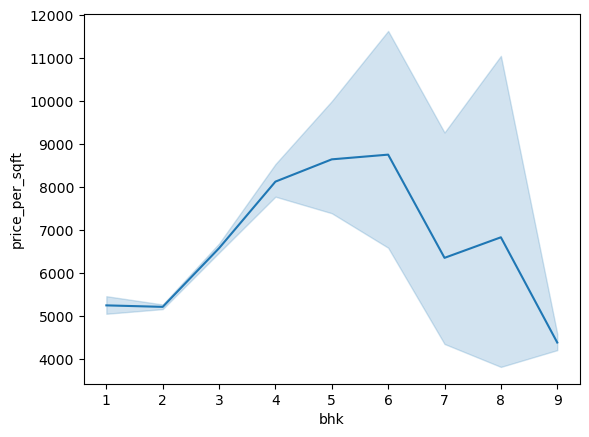

In [32]:
## Lets check the same with lineplot
sns.lineplot(x='bhk',y='price_per_sqft', data=df2)

### Price per sqft is increasing as BHK is increasing, but there is a fall in price per sqft above 6 bhk houses

Text(0.5, 1.0, 'Count of BHKs')

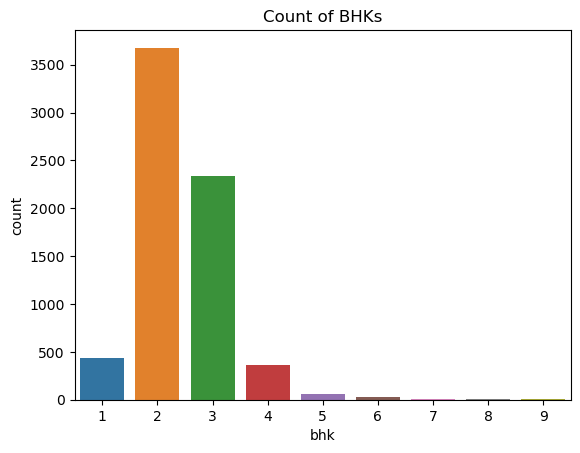

In [31]:
sns.countplot(x='bhk', data=df2)
plt.title("Count of BHKs")

#### Count of 2 bhk house is highest, then followed by 3 bhk house

<Axes: title={'center': 'Comparing Price per sqft area of 2 BHK V/S 3 BHK'}, xlabel='bhk', ylabel='price_per_sqft'>

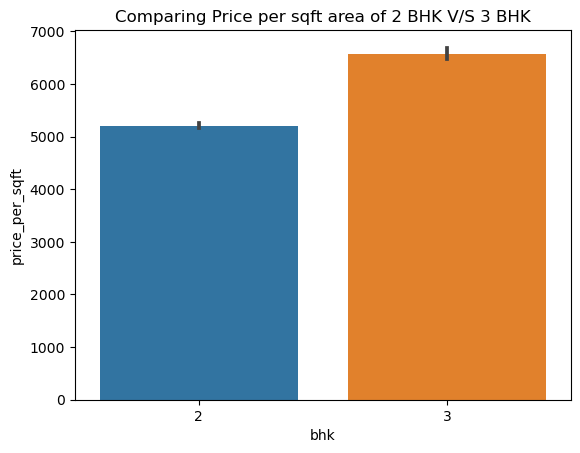

In [8]:
## Let's compare price per sqft area of 2 bhk v/s 3 bhk
plt.title("Comparing Price per sqft area of 2 BHK V/S 3 BHK")
dfn=df2[(df2["bhk"]==2)|(df2["bhk"]==3)]
sns.barplot(x="bhk",y="price_per_sqft", data=dfn)

#### Price per sqft is less for 2 bhk house as compared to 3 bhk house

### Number of balconies v/s price per sqft

Text(0.5, 1.0, 'No of Balconies V/S Price per sqft area')

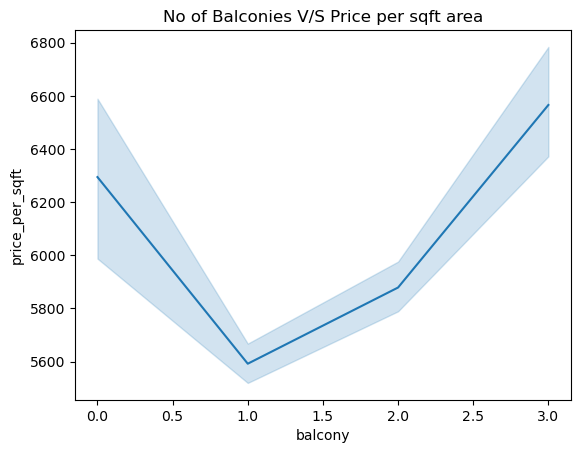

In [37]:
sns.lineplot(x='balcony',y='price_per_sqft',data=df2)
plt.title("No of Balconies V/S Price per sqft area")

#### We can conclude here that price per sqft is increasing as number of balcony is increasing

In [38]:
df2.describe()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,super_builtup_area,builtup_area,plot_area,available,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
count,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,...,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000
mean,2.357473,1.572420,92.322058,1442.094279,2.435675,5868.919399,0.753397,0.181700,0.060278,0.789968,...,0.003180,0.003180,0.002891,0.002891,0.002457,0.003036,0.002891,0.002746,0.002891,0.002891
std,0.837788,0.781751,105.359023,795.303748,0.808449,2507.265232,0.431065,0.385625,0.238018,0.407360,...,0.056307,0.056307,0.053694,0.053694,0.049514,0.055016,0.053694,0.052338,0.053694,0.053694
min,1.000000,0.000000,10.000000,350.000000,1.000000,1250.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,49.000000,1090.250000,2.000000,4400.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,68.000000,1250.000000,2.000000,5386.816368,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,100.000000,1602.000000,3.000000,6578.947368,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,3.000000,2912.000000,30400.000000,9.000000,35000.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
# Checking the correlation
df2[['bath', 'balcony', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'super_builtup_area', 'builtup_area', 'plot_area', 'available']].corr()

,bath,balcony,total_sqft_int,bhk,price_per_sqft,super_builtup_area,builtup_area,plot_area,available
bath,1.000000,0.300074,0.676229,0.875053,0.335517,-0.111749,0.031170,0.152927,0.016270
balcony,0.300074,1.000000,0.233158,0.284045,0.070028,0.122504,-0.049171,-0.142729,0.118364
total_sqft_int,0.676229,0.233158,1.000000,0.674932,0.385540,-0.128785,0.016462,0.210531,0.014851
bhk,0.875053,0.284045,0.674932,1.000000,0.312623,-0.134302,0.043292,0.170791,0.038208
price_per_sqft,0.335517,0.070028,0.385540,0.312623,1.000000,-0.102511,-0.025839,0.229835,0.036447
super_builtup_area,-0.111749,0.122504,-0.128785,-0.134302,-0.102511,1.000000,-0.823633,-0.442681,-0.118815
builtup_area,0.031170,-0.049171,0.016462,0.043292,-0.025839,-0.823633,1.000000,-0.119344,0.115049
plot_area,0.152927,-0.142729,0.210531,0.170791,0.229835,-0.442681,-0.119344,1.000000,0.027709
available,0.016270,0.118364,0.014851,0.038208,0.036447,-0.118815,0.115049,0.027709,1.000000


<Axes: >

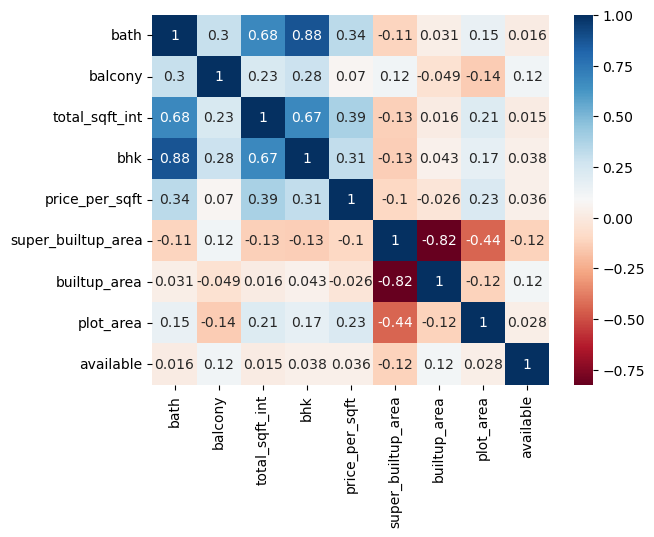

In [42]:
sns.heatmap(df2[['bath', 'balcony', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'super_builtup_area', 'builtup_area', 'plot_area', 'available']].corr(),annot=True,cmap="RdBu")

## Building the Model using KNN 

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

X=df2[['bath', 'balcony', 'total_sqft_int', 'bhk','price_per_sqft','super_builtup_area',
       'builtup_area', 'plot_area', 'available']]
y=df2['price']


In [10]:
def train_test(X,y):
    X_train, X_test,y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=1234)
    print(X_train.shape), print(y_train.shape), print(X_test.shape),print(y_test.shape)
    return X_train, X_test, y_train, y_test

In [11]:
# Standard method to choose K
k=sqrt(df2.shape[0])
k

83.17451532771321

In [12]:
print("Calling the train_test function")
X_train, X_test,y_train, y_test= train_test(X,y)

def modelling(X_train, y_train, X_test):
    model=KNeighborsRegressor(n_neighbors=83)
    model_fit=model.fit(X_train, y_train)
    print("Model training completed")
    pred=model_fit.predict(X_test)
    return pred

print("Calling the modelling function")
pred=modelling(X_train, y_train, X_test)
print(pred)
r2score=(round(r2_score(y_test,pred)*100,2))
print("----------------------------")
print("KNN Regression")
print("r2_score=",r2score)
rmse = m.sqrt(mean_squared_error(y_test,pred))
print('RMSE:',rmse)

Calling the train_test function
(5534, 9)
(5534,)
(1384, 9)
(1384,)
Calling the modelling function
Model training completed
[94.07       51.75373494 20.15331325 ... 46.81759036 65.73072289
 50.90771084]
----------------------------
KNN Regression
r2_score= 63.43
RMSE: 65.6626867022886


#### Our Model is giving us accuracy of 63.43% 

In [13]:
#Error method
error_rate=[]
for i in range(1,100):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(1-r2_score(y_test,pred_i))

In [14]:
error_rate

[0.005479123010749265,
 0.05409306930762148,
 0.1067413288955954,
 0.0890612227187032,
 0.10031576962157795,
 0.1303040097792294,
 0.1438600776347826,
 0.16353429782238904,
 0.18657543338216076,
 0.19434376831980316,
 0.186634395701626,
 0.1777894033117452,
 0.19422689185585895,
 0.1992283550514936,
 0.20833110691211176,
 0.21878816427211922,
 0.2250688388598634,
 0.2297235962894244,
 0.23263971011333218,
 0.24021784654653588,
 0.22901466214503963,
 0.21700861875215627,
 0.22352635138503718,
 0.22651389008156564,
 0.2316546947585013,
 0.23593682059451848,
 0.2416769587687746,
 0.24505876621252087,
 0.25117142877426546,
 0.2555515732083623,
 0.25743590313094167,
 0.2595068868306485,
 0.2629018462042212,
 0.265097336852991,
 0.2683672227533139,
 0.272775406440523,
 0.2755703266657169,
 0.2786348354428837,
 0.27989994241732985,
 0.2812130850851261,
 0.2845478908842909,
 0.2879122705662842,
 0.2901877681057603,
 0.2930806869668612,
 0.2960095178612595,
 0.2985395885556872,
 0.3008701958007

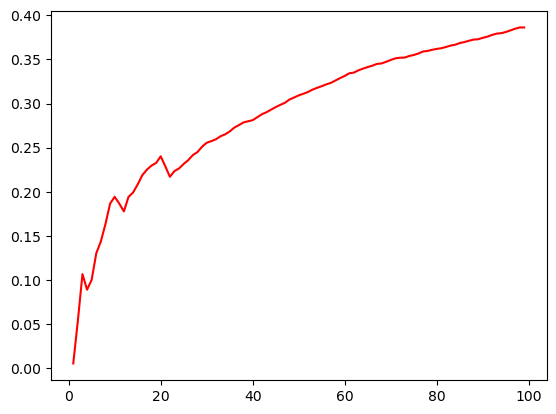

In [15]:
plt.plot(range(1,100),error_rate,color="red")